In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [4]:
# Initialize model parameters (mean and variance) according to explanation above; also parameters of distribution we're trying to match
m = 2 # Dimension of distributions
m0 = np.zeros(m)
s0 = np.eye(m)
# a = torch.tensor([5, 5], dtype=torch.float64, requires_grad=True)  # Example tensor for a
a = np.array([5,5])
mt = a
st = 1
gamma = 0.03 # -> This is just the "step size" in the proximal step
d = 5000 # how many particles we have at each step

# Initializing arrays that will keep updates of means and variances
n = 100
# particles = [torch.from_numpy(np.random.multivariate_normal(m0,s0,d))]
particles = [np.random.multivariate_normal(m0,s0,d)]

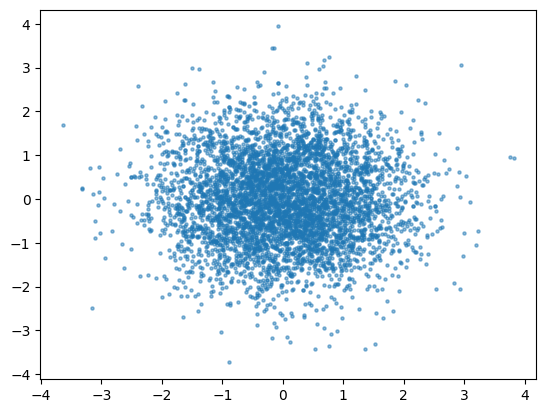

In [5]:
plt.scatter(particles[0][:, 0], particles[0][:, 1], s=5, alpha=0.5)

### ULA solving method

In [33]:
def ula_gmm(xk,zk):
    return (1-gamma)*xk + gamma*np.tanh(np.dot(xk,a))*a + np.sqrt(2*gamma)*zk

In [34]:
# Set iterative updates
# x_old = np.ones(d)
# f = lambda x: x - (gamma/(1+gamma))*np.tanh(x)*a - ((1-gamma)/(1+gamma))*x_old-(gamma/(1+gamma))*np.tanh(a*x_old)*a - np.sqrt(4*gamma)/(1+gamma)*z
old_particles = particles[0]
for i in range(1,n+1):
    tmp_particles = np.zeros((d,m))
    for j in range(0,d):
        # Update particles
        x_old = old_particles[j]
        z = np.random.multivariate_normal(m0,s0,1)
        tmp_particles[j] = ula_gmm(x_old,z)
    particles.append(tmp_particles)
    old_particles = tmp_particles    

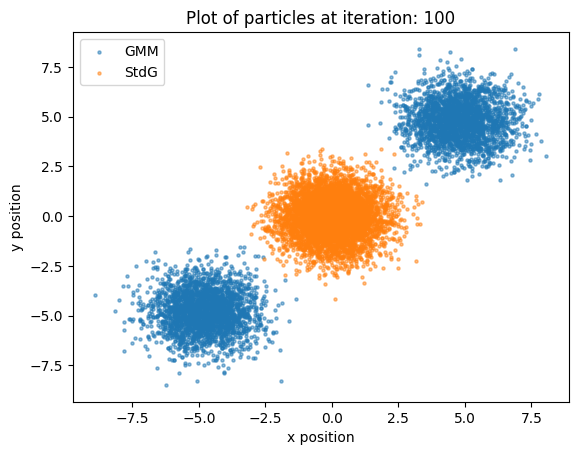

In [35]:
plt.scatter(particles[-1][:, 0], particles[-1][:, 1], s=5, alpha=0.5,label="GMM")
plt.scatter(particles[0][:, 0], particles[0][:, 1], s=5, alpha=0.5,label="StdG")
plt.title("Plot of particles at iteration: " + str(n))
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()

In [39]:
for i in range(1,n):
    plt.figure()
    plt.scatter(particles[i][:, 0], particles[i][:, 1], s=5, alpha=0.5,label="GMM")
    plt.scatter(particles[0][:, 0], particles[0][:, 1], s=5, alpha=0.5,label="StdG")
    plt.xlim(left=-7.8,right=7.8)
    plt.ylim(bottom=-7.8,top=7.8)
    plt.title("Plot of particles at iteration: " + str(i))
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.legend()
    plt.savefig("GmmImages/iter_" + str(i+1) + ".png")
    plt.close()

In [40]:
import glob
from PIL import Image
files = glob.glob(r"GmmImages/*.png")

# Define a custom key function to extract the iteration number from each filename
def get_iteration_number(filename):
    return int(filename.split('_')[-1].split('.')[0])

# Sort the list of filenames using the custom key function
sorted_filenames = sorted(files, key=get_iteration_number)

# Create a list to store PIL Image objects
image_array = []

# Load each image and append it to the list
for filename in sorted_filenames:
    image = Image.open(filename)
    image_array.append(image)

# Specify the output GIF filename
output_gif_filename = "GmmImages/output.gif"

# Save the list of images as a GIF
image_array[0].save(
    output_gif_filename,
    save_all=True,
    append_images=image_array[1:],
    duration=200,  # Set the duration for each frame in milliseconds
    loop=0,  # Set loop to 0 for infinite loop, or any other integer for a finite loop
)

### SLA solving method

In [6]:
old_particles = particles[0]
for i in range(1,n+1):
    tmp_particles = np.zeros((d,m))
    for j in range(0,d):
        # Update particles
        x_old = old_particles[j]
        z = np.random.multivariate_normal(m0,s0,1)[0]
        f = lambda x: x - (gamma/(1+gamma))*np.tanh(np.dot(a,x))*a - ((1-gamma)/(1+gamma))*x_old - (gamma/(1+gamma))*np.tanh(np.dot(a,x_old))*a - np.sqrt(4*gamma)/(1+gamma)*z
        int_x = root(f,x0=x_old)
        tmp_particles[j] = int_x.x
    particles.append(tmp_particles)
    old_particles = tmp_particles    

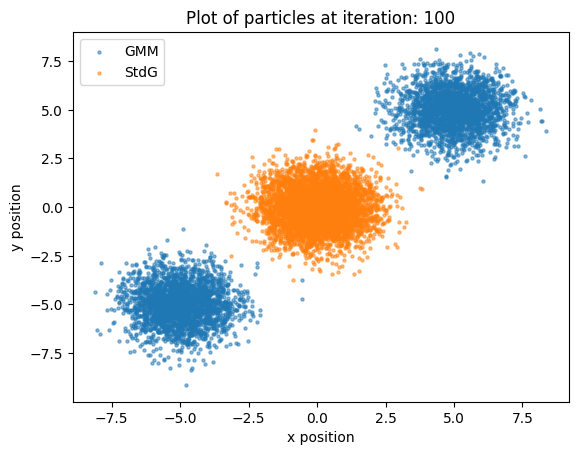

In [7]:
plt.scatter(particles[-1][:, 0], particles[-1][:, 1], s=5, alpha=0.5,label="GMM")
plt.scatter(particles[0][:, 0], particles[0][:, 1], s=5, alpha=0.5,label="StdG")
plt.title("Plot of particles at iteration: " + str(n))
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()

In [8]:
for i in range(1,n):
    plt.figure()
    plt.scatter(particles[i][:, 0], particles[i][:, 1], s=5, alpha=0.5,label="GMM")
    plt.scatter(particles[0][:, 0], particles[0][:, 1], s=5, alpha=0.5,label="StdG")
    plt.xlim(left=-7.8,right=7.8)
    plt.ylim(bottom=-7.8,top=7.8)
    plt.title("Plot of particles at iteration: " + str(i))
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.legend()
    plt.savefig("GmmImagesSLA/iter_" + str(i+1) + ".png")
    plt.close()

import glob
from PIL import Image
files = glob.glob(r"GmmImagesSLA/*.png")

# Define a custom key function to extract the iteration number from each filename
def get_iteration_number(filename):
    return int(filename.split('_')[-1].split('.')[0])

# Sort the list of filenames using the custom key function
sorted_filenames = sorted(files, key=get_iteration_number)

# Create a list to store PIL Image objects
image_array = []

# Load each image and append it to the list
for filename in sorted_filenames:
    image = Image.open(filename)
    image_array.append(image)

# Specify the output GIF filename
output_gif_filename = "GmmImagesSLA/output.gif"

# Save the list of images as a GIF
image_array[0].save(
    output_gif_filename,
    save_all=True,
    append_images=image_array[1:],
    duration=200,  # Set the duration for each frame in milliseconds
    loop=0,  # Set loop to 0 for infinite loop, or any other integer for a finite loop
)